# Overturning

Example code to diagnose overturning in density space from `mom6-panan` simulations.

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm

In [2]:
#db='/g/data/ik11/outputs/mom6-panan/panant.db'
session=cc.database.create_session()
#expts = ['panant-v2','panant-hycom1','panant-01-zstar','panant-01-hycom1']
expts = ['panant-01-zstar','panant-01-hycom1']

In [3]:
client = Client()
client

distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-us3q7cqs', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-706zxb9z', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-3590r9rj', purging
distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-barlf2sn', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42217,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://10.0.128.135:39295,Total threads: 4
Dashboard: /proxy/44127/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:45795,


## Plot overturning over first 2 years for all expts

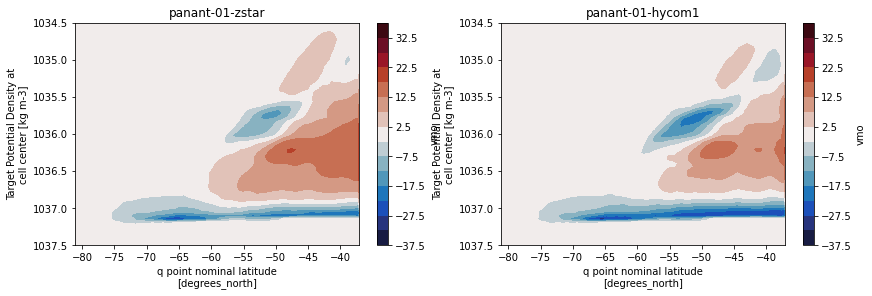

In [4]:
plt.figure(figsize=(14,9))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_year1 = vmo.sel(time=slice('1991-01-01','1992-12-31')).sum('xh').mean('time').load()/1e9
    plt.subplot(2,2,ii)
    vmo_year1.cumsum('rho2_l').plot.contourf(levels=np.arange(-37.5,38,5),cmap=cm.cm.balance)
    plt.ylim([1034.5,1037.5])
    plt.gca().invert_yaxis()
    plt.title(expt)


## Plot overturning over last 2 years of HYCOM1 expt

In [5]:
vmo = cc.querying.getvar('panant-01-hycom1', 'vmo', session)

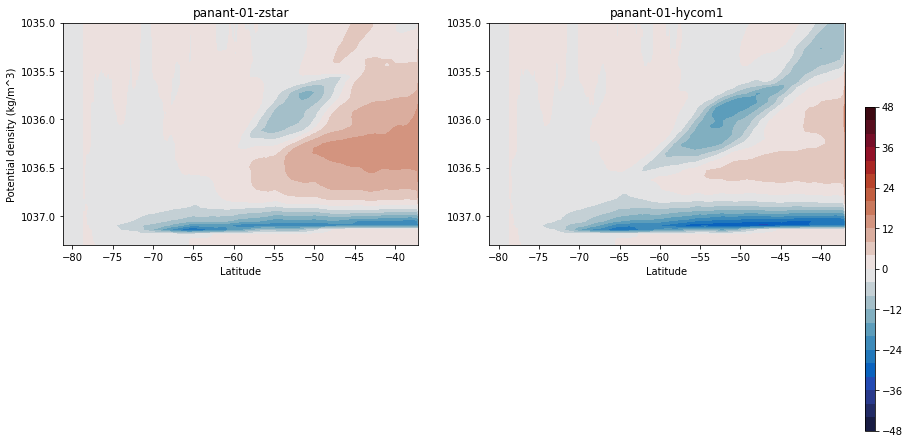

In [5]:
plt.figure(figsize=(14,9))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_lastyear = vmo.sel(time=slice('1998-01-01','1999-12-31')).sum('xh').mean('time').load()/1e9
    plt.subplot(2,2,ii)
    p1 = vmo_lastyear.cumsum('rho2_l').plot.contourf(add_colorbar=False,levels=np.arange(-48,49,4),cmap=cm.cm.balance)
    plt.ylim([1035,1037.3])
    #plt.axhline(1037.1,color='y',linestyle='--',linewidth=0.5)
    plt.gca().invert_yaxis()
    plt.title(expt)
    if (ii==1):
        plt.ylabel('Potential density (kg/m^3)')
    else:
        plt.ylabel('')
    plt.xlabel('Latitude')

ax_c = plt.axes([0.92,0.25,0.01,0.5])
plt.colorbar(p1,cax=ax_c)
#plt.savefig('figures/overturning.png')

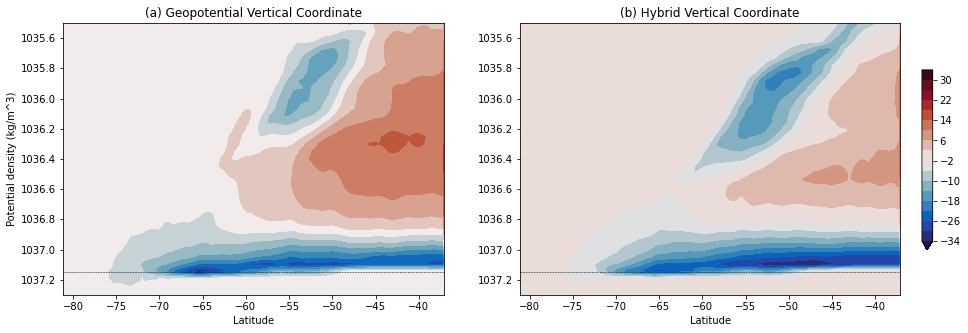

In [6]:
plt.figure(figsize=(15,5))
ii=0
for expt in ['panant-01-zstar','panant-01-hycom1']:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_lastyear = vmo.sel(time=slice('1998-01-01','1999-12-31')).sum('xh').mean('time').load()/1e9
    plt.subplot(1,2,ii)
    p1 = vmo_lastyear.cumsum('rho2_l').plot.contourf(add_colorbar=False,levels=np.arange(-34,35,4),cmap=cm.cm.balance)
    plt.ylim([1035.5,1037.3])
    #plt.axhline(1037.1,color='y',linestyle='--',linewidth=0.5)
    plt.gca().invert_yaxis()
    plt.title(expt)
    plt.axhline(1037.15,linestyle='--',color='k',linewidth=0.5)
    if (ii==1):
        plt.ylabel('Potential density (kg/m^3)')
    else:
        plt.ylabel('')
    plt.xlabel('Latitude')
    
plt.subplot(121)
plt.title('(a) Geopotential Vertical Coordinate')
plt.subplot(122)
plt.title('(b) Hybrid Vertical Coordinate')

ax_c = plt.axes([0.92,0.25,0.01,0.5])
plt.colorbar(p1,cax=ax_c)
plt.savefig('/g/data/x77/amh157/mom6-panan-diagnostics/figures/overturning.png')

## Plot timeseries of overturning

Look at extrema at several different latitudes

-28.166056
-26.546322


Text(0.5, 1.0, 'Abyssal cell transport - 65°S')

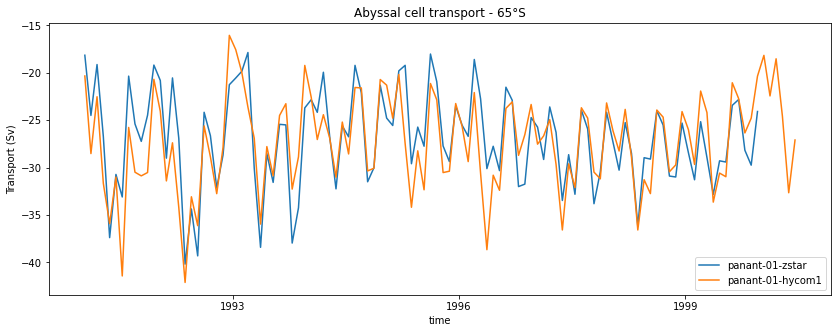

In [7]:
plt.figure(figsize=(14,5))
lat = -65
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)
    print(vmo_ts.sel(time=slice('1998-01-01','2000-12-31')).mean('time').values)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

-23.50091
-30.796972


Text(0.5, 1.0, 'Abyssal cell transport - 55°S')

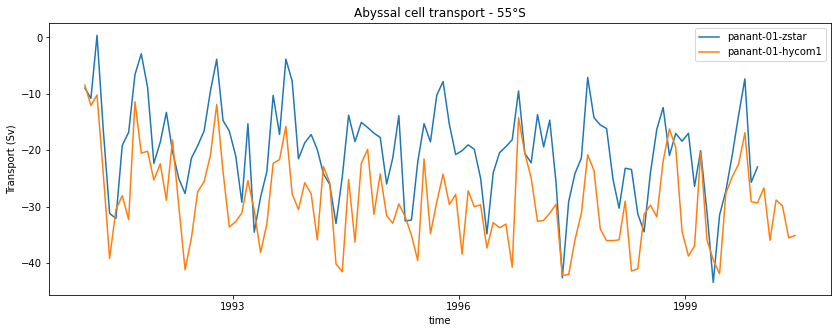

In [8]:
plt.figure(figsize=(14,5))
lat = -55
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)
    print(vmo_ts.sel(time=slice('1998-01-01','2000-12-31')).mean('time').values)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

-21.151255
-32.04853


Text(0.5, 1.0, 'Abyssal cell transport - 45°S')

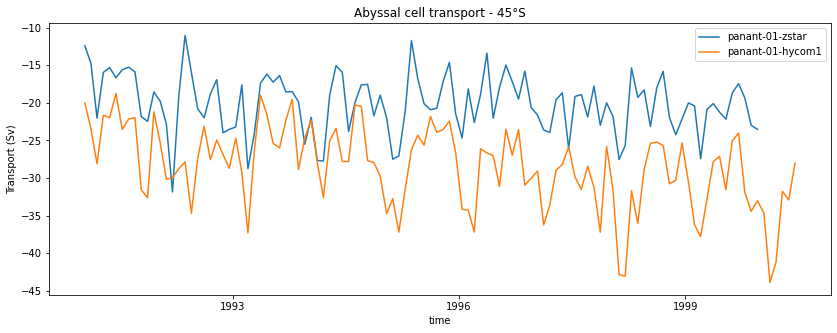

In [9]:
plt.figure(figsize=(14,5))
lat = -45
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1036.5,1037.5)).min(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)
    print(vmo_ts.sel(time=slice('1998-01-01','2000-12-31')).mean('time').values)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Abyssal cell transport - %d°S'%(-lat))

15.69724
9.944905


Text(0.5, 1.0, 'Upper cell transport - 45°S')

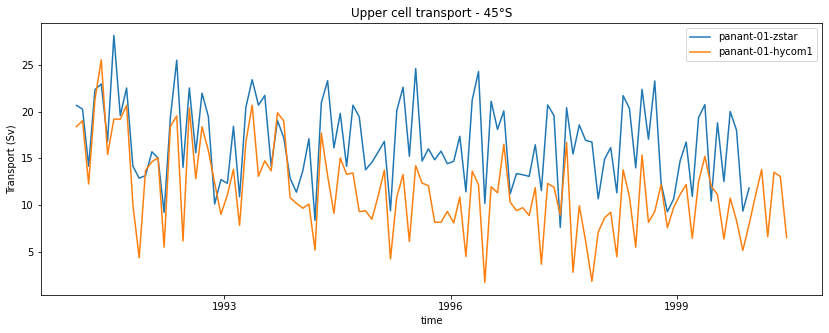

In [10]:
plt.figure(figsize=(14,5))
lat = -45
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)
    print(vmo_ts.sel(time=slice('1998-01-01','2000-12-31')).mean('time').values)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Upper cell transport - %d°S'%(-lat))

18.791826
16.707878


Text(0.5, 1.0, 'Upper cell transport - 37°S')

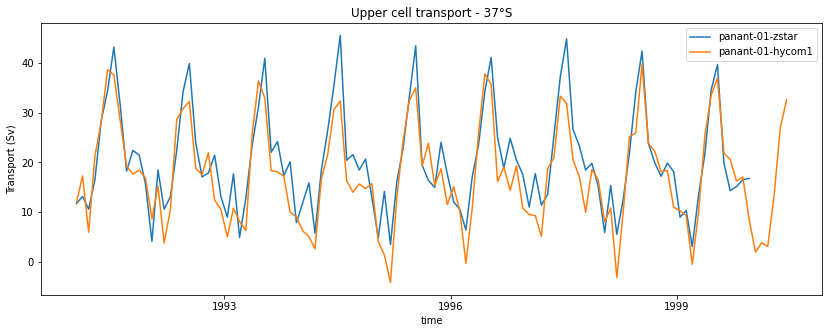

In [11]:
plt.figure(figsize=(14,5))
lat = -37
for expt in expts:
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_ts = vmo.sel(yq=lat,method='nearest').sum('xh').cumsum('rho2_l').sel(rho2_l=slice(1035,1037)).max(dim='rho2_l').load()/1e9
    vmo_ts.plot(label=expt)
    print(vmo_ts.sel(time=slice('1998-01-01','2000-12-31')).mean('time').values)

plt.legend()
plt.ylabel('Transport (Sv)')
plt.title('Upper cell transport - %d°S'%(-lat))

## Velocity profile at 45°S

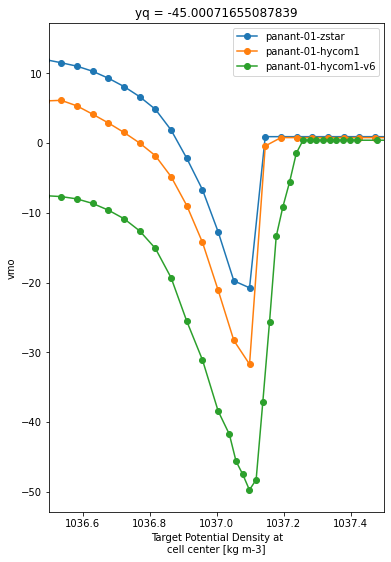

In [14]:
plt.figure(figsize=(6,9))
ii=0
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_profile45 = vmo.sel(yq=-45,method='nearest').sel(time=slice('1998-01-01','2000-12-31')).sum('xh').mean('time').load()/1e9
    vmo_profile45.cumsum('rho2_l').plot(marker='o',label=expt)
    plt.xlim([1036.5,1037.5])
plt.legend()

## Try at northern boundary?

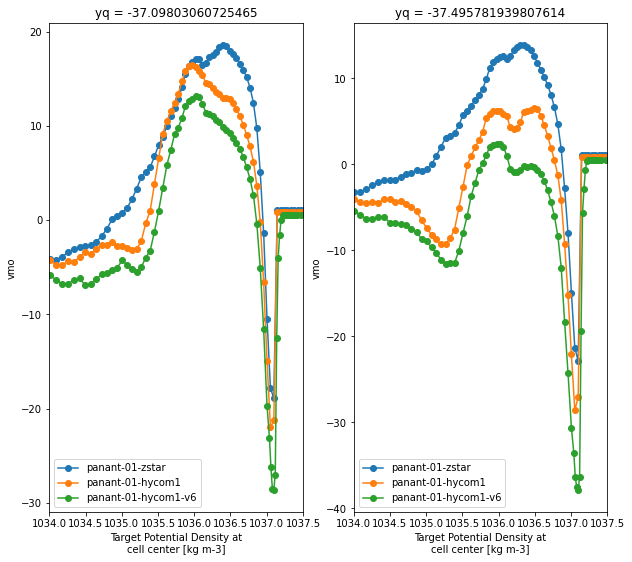

In [15]:
plt.figure(figsize=(10,9))
ii=0
plt.subplot(121)
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session)
    vmo_profile45 = vmo.sel(yq=-37,method='nearest').sel(time=slice('1998-01-01','2000-12-31')).sum('xh').mean('time').load()/1e9
    vmo_profile45.cumsum('rho2_l').plot(marker='o',label=expt)
    plt.xlim([1034,1037.5])
plt.legend()


ii=0
plt.subplot(122)
for expt in expts:
    ii+=1
    vmo = cc.querying.getvar(expt, 'vmo', session, chunks={'yq':120})
    vmo_profile45 = vmo.sel(yq=-37.5,method='nearest').sel(time=slice('1998-01-01','2000-12-31')).sum('xh').mean('time').load()/1e9
    vmo_profile45.cumsum('rho2_l').plot(marker='o',label=expt)
    plt.xlim([1034,1037.5])
plt.legend()